# Langchain Models

## What is Models ?

  - LangChain's model component is a crucial part of the framework, designed to enable interactions with various language models and embedding models.
  
  - LangChain itself doesn't create these models; instead, it provides a standardized interface to interact with a wide variety of different language models and related computational engines offered by various providers (like OpenAI, Anthropic, Google, Hugging Face, etc.) or even locally hosted models.

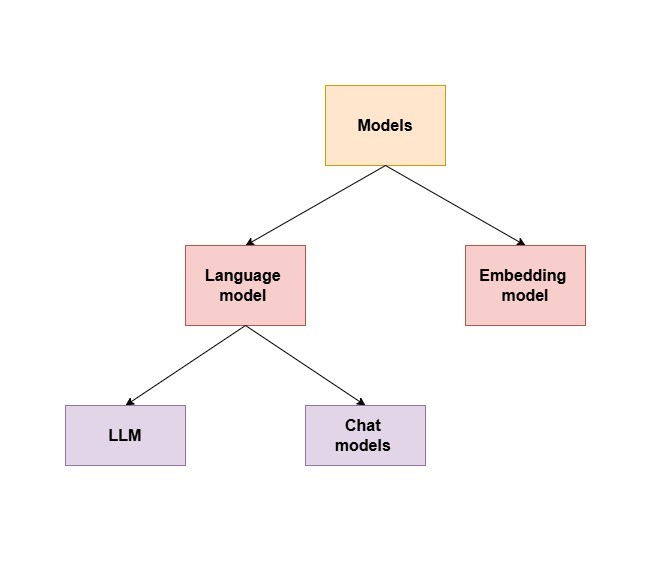

## Types of Models

  1. **LLMs (Large Language Models)**:
  - What they are: These are the foundational models trained on vast amounts of text data. They typically take a text string (prompt) as input and generate a text string (completion) as output.
  - Use Cases: Text generation, completion, summarization, question-answering (in a more direct text-in, text-out fashion).
  - Examples of Underlying Models: GPT-3.5-instruct (OpenAI), older foundational models, many models available via Hugging Face Hub that follow a simple text completion API.

  2. **Chat Models**:
  - What they are: These are often LLMs fine-tuned specifically for conversational interactions. They typically take a list of chat messages (with roles like 'system', 'user', 'assistant') as input and output a chat message (usually from the 'assistant').
  - Use Cases: Building chatbots, conversational agents, applications where maintaining context and understanding dialogue turns is crucial. This interface is generally preferred for newer, more capable models.
  - Examples of Underlying Models: GPT-4, GPT-3.5-turbo (OpenAI), Claude 3 models (Anthropic), Gemini Pro (Google), many modern LLMs.

  3. **Text Embedding Models**:
  - What they are: These models convert pieces of text (words, sentences, documents) into numerical vector representations (embeddings). Texts with similar meanings will have vectors that are close together in the vector space.
  - Use Cases: Semantic search (finding text similar to a query), retrieval-augmented generation (RAG - finding relevant documents to provide context to an LLM/Chat Model), clustering, classification, recommendations.
  - Examples of Underlying Models: text-embedding-ada-002 (OpenAI), Cohere's Embed models, Sentence Transformers models (e.g., from Hugging Face), Google's embedding models.

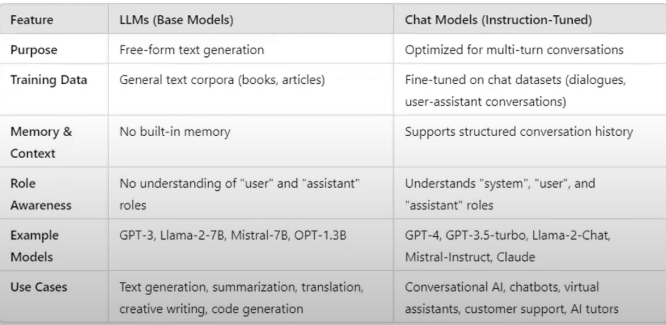

## Setup

  1. create a folder
  2. create a virtual enviroment : python -m venv env
  3. active : .\env\Scripts\activate
  4. create .env file and inside that add API keys

# Code

## LLM

In [ ]:
from langchain_openai import OpenAI
from dotenv import load_dotenv

load_dotenv()

model = OpenAI(model='gpt-3.5-turbo-instruct')

result = model.invoke("What is llm?")
print(result)

## Chat Models

In [ ]:
from langchain_openai import ChatOpenAI   # for openai
from langchain_anthropic import ChatAnthropic # for anthropic
from langchain_google_genai import ChatGoogleGenerativeAI # for gemini

from dotenv import load_dotenv

load_dotenv()

model = ChatOpenAI(model='gpt-4', temperature=1.5, max_completion_tokens=10)
model = ChatAnthropic(model='claude-3-5-sonnet-20241022')
model = ChatGoogleGenerativeAI(model='gemini-1.5-pro')

result = model.invoke("What is llm?")
print(result.content)

In [ ]:
# using Huggingface API
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv

load_dotenv()

llm = HuggingFaceEndpoint(
    repo_id="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    task="text-generation"
)

model = ChatHuggingFace(llm=llm)

result = model.invoke("What is llm?")

print(result.content)

In [ ]:
# using local downloaded model
from langchain_huggingface import ChatHuggingFace, HuggingFacePipeline

llm = HuggingFacePipeline.from_model_id(
    model_id='TinyLlama/TinyLlama-1.1B-Chat-v1.0',
    task='text-generation',
    pipeline_kwargs=dict(
        temperature=0.5,
        max_new_tokens=100
    )
)
model = ChatHuggingFace(llm=llm)

result = model.invoke("What is llm?")

print(result.content)

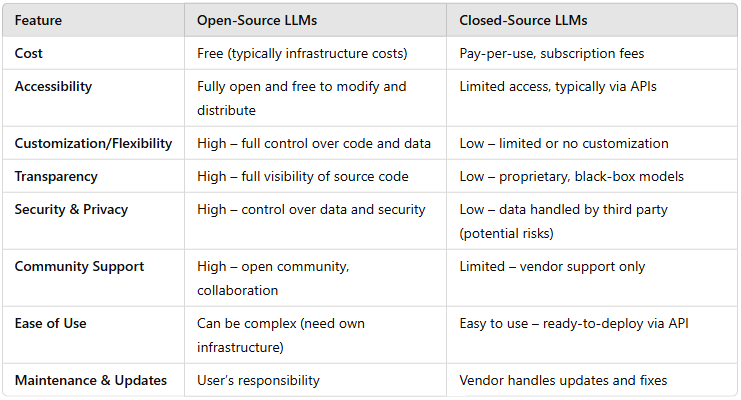

## Embeddings Models

In [ ]:
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=32)

result = embedding.embed_query("Delhi is the capital of India")

print(str(result))

In [ ]:
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=32)

documents = [
    "Delhi is the capital of India",
    "Kolkata is the capital of West Bengal",
    "Paris is the capital of France"
]

result = embedding.embed_documents(documents)

print(str(result))

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')

documents = [
    "Delhi is the capital of India",
    "Kolkata is the capital of West Bengal",
    "Paris is the capital of France"
]

vector = embedding.embed_documents(documents)

print(str(vector))

In [ ]:
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

load_dotenv()

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=300)

documents = [
    "Virat Kohli is an Indian cricketer known for his aggressive batting and leadership.",
    "MS Dhoni is a former Indian captain famous for his calm demeanor and finishing skills.",
    "Sachin Tendulkar, also known as the 'God of Cricket', holds many batting records.",
    "Rohit Sharma is known for his elegant batting and record-breaking double centuries.",
    "Jasprit Bumrah is an Indian fast bowler known for his unorthodox action and yorkers."
]

query = 'tell me about bumrah'

doc_embeddings = embedding.embed_documents(documents)
query_embedding = embedding.embed_query(query)

scores = cosine_similarity([query_embedding], doc_embeddings)[0]

index, score = sorted(list(enumerate(scores)),key=lambda x:x[1])[-1]

print(query)
print(documents[index])
print("similarity score is:", score)



